# Aplicação utilizando Aprendizado semi-supervisionado

## SVM Wine

Referências:
https://www.kaggle.com/code/saptarsi/a-simple-semi-supervised-strategy-svm-wine?scriptVersionId=46704110Supervisionado

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt

In [15]:
X, y = datasets.load_wine(return_X_y=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train, X_unl, y_train, y_unl = train_test_split(X_train,y_train,test_size=0.7,random_state=1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_unl.shape)

(37, 13)
(54, 13)
(87, 13)


## Treinamento do conjunto rotulado

In [20]:
clf = svm.SVC(kernel='linear', probability=True, C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9259259259259259

In [21]:
clp = clf.predict_proba(X_unl)
lab = clf.predict(X_unl)

In [22]:
df = pd.DataFrame(clp, columns = ['class_0','class_1','class_2'])
df['label'] = lab
df['actual'] = y_unl
df['max'] = df[['class_0','class_1','class_2']].max(axis=1)
df

,class_0,class_1,class_2,label,actual,max
0,0.417417,0.487309,0.095274,0,0,0.487309
1,0.205373,0.461340,0.333287,2,2,0.461340
2,0.447248,0.414741,0.138011,0,0,0.447248
3,0.178641,0.168906,0.652452,2,2,0.652452
4,0.261294,0.642596,0.096110,1,1,0.642596
...,...,...,...,...,...,...
82,0.330007,0.534795,0.135199,0,0,0.534795
83,0.247713,0.089254,0.663033,2,2,0.663033
84,0.173406,0.726686,0.099908,1,1,0.726686
85,0.305012,0.441353,0.253635,0,0,0.441353


## Escolhendo nível de confiança

In [23]:
nc = np.arange(.35,1,.03)
acc = np.empty(22)
i = 0
for k in np.nditer(nc):
  conf_ind=df['max']>k
  X_train1 = np.append(X_train,X_unl[conf_ind,:],axis=0)
  y_train1 = np.append(y_train,df.loc[conf_ind,['label']])
  clf = svm.SVC(kernel='linear', probability=True, C=1).fit(X_train1, y_train1)
  acc[i] = clf.score(X_test, y_test)
  i = i+1

## Plot da confiança

(array([ 5., 12.,  6.,  9.,  9., 12., 10., 11.,  7.,  6.]),
 array([0.39441337, 0.43166756, 0.46892176, 0.50617595, 0.54343014,
        0.58068433, 0.61793853, 0.65519272, 0.69244691, 0.7297011 ,
        0.7669553 ]),
 <BarContainer object of 10 artists>)

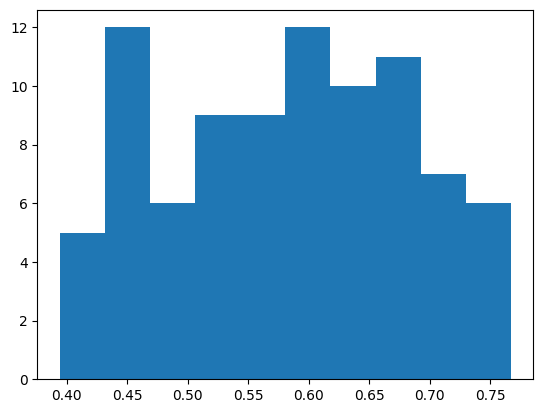

In [24]:
plt.hist(df['max'])

## Confiança vs Precisão

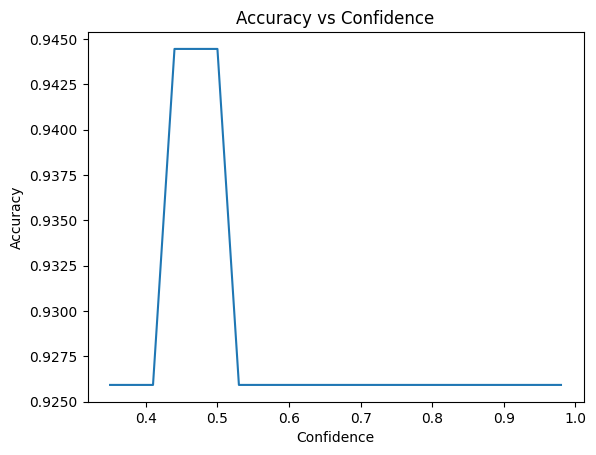

In [25]:
x = pd.Series(acc,index=nc)
x.plot()
plt.title('Accuracy vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.show()